# Proyecto de Grado - Ciencia de Datos
# Universidad Libre Cali
## Leiner Ceballos Rodriguez
## David Cespedes

In [1]:
import pandas as pd
import numpy as np
import numpy.ma as ma
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates

In [2]:
# Tabla de facturas
tbl_facturas = pd.read_excel("TBL_FACTURAS.xlsx")

In [3]:
# Tabla de sucursales
tbl_sucursales = pd.read_excel("TBL_SUCURSALES.xlsx")

In [4]:
# Unión entre ambos DataFrames
df_fact_sucursal = pd.merge(left=tbl_facturas,right=tbl_sucursales, left_on='SUCURSAL', right_on='ID_SUCURSAL')

### Se exportan los datos necesarios para crear un solo DataFrame

In [5]:
# Se exportan los datos de la tabla de contratos
tbl_contratos = pd.read_excel("TBL_CONTRATOS.xlsx")
# Unión entre el merge y tbl_contratos
merged_contratos = pd.merge(left=tbl_contratos, right=df_fact_sucursal, how='left', left_on='ID_CONTRATO', right_on='CONTRATO')
# Se exportan los datos de la tabla de planes isp
tbl_planes = pd.read_excel("TBL_PLANES_ISP.xlsx")
# Unión entre el merge y tbl_planes_isp
merged_planes = pd.merge(left=merged_contratos,right=tbl_planes, left_on='PLANISP', right_on='ID_PLAN_ISP')
# Se exportan los datos de la tabla de productos
tbl_productos = pd.read_excel("TBL_PRODUCTOS.xlsx")
# Unión entre el merge y tbl_productos
merged_productos = pd.merge(left=merged_planes,right=tbl_productos, left_on='PRODUCTO', right_on='ID_PRODUCTO')

### Datos Finales

In [6]:
# DataFrame de Datos
datos = pd.DataFrame(merged_productos)
df_principal = pd.DataFrame(df_fact_sucursal)

### Se limpian los datos vacios o nulos

In [7]:
# ¿Hay datos nulos?
print(datos.info())
print(datos.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45463 entries, 0 to 45462
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID_CONTRATO      45463 non-null  int64         
 1   PLANISP          45463 non-null  int64         
 2   SERVER           45463 non-null  int64         
 3   EQUIPO           45463 non-null  int64         
 4   ROUTER_UK        45463 non-null  int64         
 5   IP               45463 non-null  object        
 6   MAC              45462 non-null  object        
 7   FECHA_CONTRATO   45463 non-null  datetime64[ns]
 8   MEDIO_CONEXION   45463 non-null  object        
 9   PREFIJO          45043 non-null  object        
 10  CONSECUTIVO      45043 non-null  float64       
 11  ID_FACTURA       45043 non-null  float64       
 12  SUCURSAL         45043 non-null  float64       
 13  CLIENTE          45043 non-null  float64       
 14  TOTAL            45043 non-null  float

### Algunos datos de la base de datos son nulos o NaN, debemos cambiarlo para tener una base de datos uniforme

In [8]:
datos['DIRECCION'].fillna("SIN DIRECCIÓN", inplace = True) # Direccion
datos['PREFIJO'].fillna("NO TIENE", inplace = True) # Prefijo
datos['ID_FACTURA'].fillna(0, inplace = True) # id factura
datos['SUCURSAL'].fillna(0, inplace = True) # Sucursal
datos['CLIENTE'].fillna(0, inplace = True) # Cliente
datos['TOTAL'].fillna(0, inplace = True) # Total
datos['CONTRATO'].fillna(0, inplace = True) # Contrato
datos['USUARIO'].fillna(0, inplace = True) # Usuario
datos['ID_SUCURSAL'].fillna(0, inplace = True) # Id sucursal

### Con el código anterior reemplazamos el valor nulo en los datos por una cadena, támbien se puede reemplazar por el promedio de la columna si fuera un campo de valores o eliminar las filas con datos nulos

### Se genera una visualización de los datos codificados

In [9]:
datos.head()

,ID_CONTRATO,PLANISP,SERVER,EQUIPO,ROUTER_UK,IP,MAC,FECHA_CONTRATO,MEDIO_CONEXION,PREFIJO,...,LATITUD,COORDENADAS,ID_PLAN_ISP,PRODUCTO,MAX_BAJADA,MAX_SUBIDA,MIN_BAJADA,MIN_SUBIDA,ID_PRODUCTO,NOMBRE_PRODUCTO
0,1,33,6,451,155,10.10.8.10,24:A4:3C:4E:88:94,2017-10-23,RADIO ENLACE,NO TIENE,...,NaN,NaN,33,309,22000,10000,0,0,309,INTERNET HOGAR RADIO BASICO
1,2010,33,1,6560,311,10.1.0.13,44:D9:E7:5C:EA:1C,2018-04-04,RADIO ENLACE,NO TIENE,...,NaN,NaN,33,309,22000,10000,0,0,309,INTERNET HOGAR RADIO BASICO
2,2490,33,6,7374,354,10.10.8.179,FC:EC:DA:64:0F:42,2018-10-04,RADIO ENLACE,FE,...,-76.519489,"3.415502003973917,-76.51948932806492",33,309,22000,10000,0,0,309,INTERNET HOGAR RADIO BASICO
3,2490,33,6,7374,354,10.10.8.179,FC:EC:DA:64:0F:42,2018-10-04,RADIO ENLACE,FE,...,-76.519489,"3.415502003973917,-76.51948932806492",33,309,22000,10000,0,0,309,INTERNET HOGAR RADIO BASICO
4,2490,33,6,7374,354,10.10.8.179,FC:EC:DA:64:0F:42,2018-10-04,RADIO ENLACE,FE,...,-76.519489,"3.415502003973917,-76.51948932806492",33,309,22000,10000,0,0,309,INTERNET HOGAR RADIO BASICO



### Se analiza el resultado para hallar las posibles correlaciones entre Total en ventas y los planes de internet.

In [10]:
# Histograma de velocidad de descarga Kb
plt.hist(datos["MAX_BAJADA"])


(array([3.0040e+04, 1.4483e+04, 8.9800e+02, 9.0000e+00, 2.1000e+01,
        9.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([  2100.,  24418.,  46736.,  69054.,  91372., 113690., 136008.,
        158326., 180644., 202962., 225280.]),
 <BarContainer object of 10 artists>)

### Varias empresas de la categoría de proveedores de internet poseen mayores velocidades en sus planes que la empresa x. Este hecho puede afectar el desempeño en ventas del servicio.

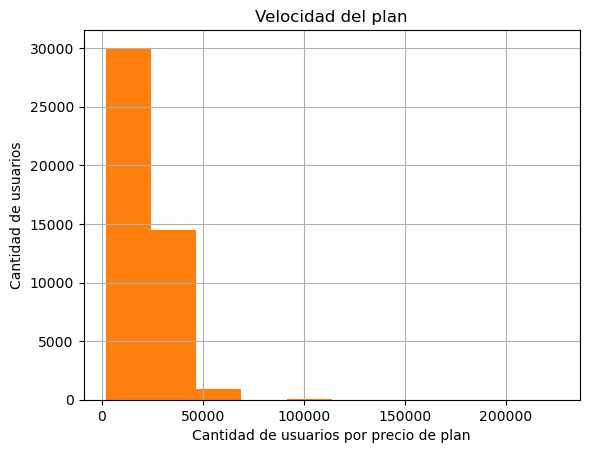

In [11]:
# Gráfica de la velocidad de descarga Kb
plt.hist(datos["MAX_BAJADA"], lw = 2)
plt.xlabel('Cantidad de usuarios por precio de plan')
plt.ylabel('Cantidad de usuarios')
plt.title('Velocidad del plan')
plt.grid(True)
  
plt.show()

### Comportamientos

In [12]:
print("Fecha inicial", df_principal['FECHA'].min())
print("Fecha final", df_principal['FECHA'].max())
print("Cantidad de dias", df_principal['FECHA'].max() - df_principal['FECHA'].min() )

Fecha inicial 2013-07-01 00:00:00
Fecha final 2021-05-20 00:00:00
Cantidad de dias 2880 days 00:00:00


In [13]:
# Se crea un Data Frame
valor = {
    'FECHA' : df_principal['FECHA'],
    'TOTAL': df_principal['TOTAL']
}
df_valor = pd.DataFrame(valor)
# se cambie el index del DataFrame
df_valor = df_valor.set_index('FECHA')
df_valor.head()

,TOTAL
FECHA,
2013-07-01,5200.0
2013-07-01,5200.0
2013-07-02,18200.0
2013-07-02,60000.0
2013-07-02,60000.0


### Comportamiento de los ganancias a nivel general

In [14]:
df_valor.plot()

<AxesSubplot:xlabel='FECHA'>

### Total de ventas por mes

In [15]:
# resample y agregacion por mes
valor_resample_mes = df_valor.TOTAL.resample('M').count()
# asignar día de la semana
df_resample = pd.concat([valor_resample_mes], axis=1)
df_resample['dayofweek'] = df_resample.index.dayofweek # 0 es lunes
# lunes a domingo
df_lun_to_dom = df_resample[df_resample.dayofweek.isin([0,1,2,3,4,5,6])].TOTAL

df_lun_to_dom.plot()

<AxesSubplot:xlabel='FECHA'>

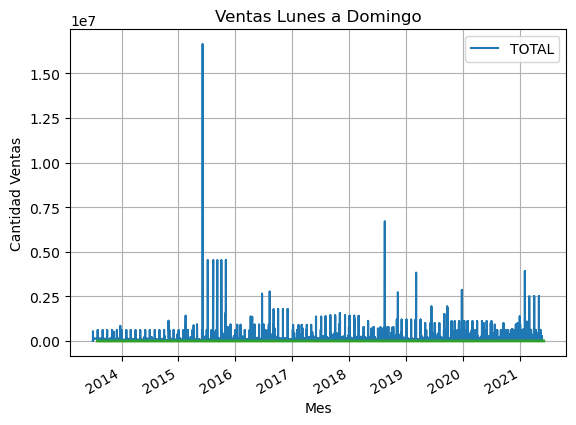

In [16]:
plt.plot(df_lun_to_dom, lw = 2)
plt.xlabel('Mes')
plt.ylabel('Cantidad Ventas')
plt.title('Ventas Lunes a Domingo')
plt.grid(True)
  
plt.show()

## Zonas donde se realizan las ventas

### Series de tiempo ¿cómo serán ventas en las distintas sucursales?

In [17]:
df2 = pd.pivot_table(df_principal,
               index=['ZONA'],
               columns=['FECHA'],
               values=['TOTAL'],
               aggfunc='count',
               fill_value=0,
               margins=False,
               margins_name='Total')

#### Se suman las filas

In [18]:
# se cambia el nombre del index
df2 = df2.rename_axis(['ZONA'])
df2 = df2.groupby('ZONA').agg('sum')
df2

TOTAL                                              \
FECHA        2013-07-01 2013-07-02 2013-07-03 2013-07-08 2013-07-13   
ZONA                                                                  
BUENAVENTURA          0          0          0          0          0   
CALI                  0          0          1          0          0   
CANDELARIA            0          0          0          0          0   
CAUCA                 0          0          0          0          0   
CENTRO                0          0          0          0          0   
DAGUA VALLE           2        125          0          4          1   
KM 30                 0          0          0          0          0   

                                                                     ...  \
FECHA        2013-07-16 2013-07-28 2013-07-29 2013-08-01 2013-08-08  ...   
ZONA                                                                 ...   
BUENAVENTURA          0          0          0          0          0  ...   
CALI                  0          0          0          1          0  ...   
CANDELARIA            0          0          0          0          0  ...   
CAUCA                 0          0          0          0          0  ...   
CENTRO                0          0          0          0          0  ...   
DAGUA VALLE           2          1          2        127          1  ...   
KM 30                 0          0          0          0          0  ...   

                                                                     \
FECHA        2021-05-04 2021-05-06 2021-05-07 2021-05-08 2021-05-10   
ZONA                                                                  
BUENAVENTURA          0          0          0          0          0   
CALI                  1          3        815          1        157   
CANDELARIA            0          0         46          0         11   
CAUCA                 0          0          7          0          3   
CENTRO                0          0          0          0          0   
DAGUA VALLE           0          0        125          0         23   
KM 30                 0          0          4          0          1   

                                                                     
FECHA        2021-05-11 2021-05-13 2021-05-18 2021-05-19 2021-05-20  
ZONA                                                                 
BUENAVENTURA          0          0          0          0          0  
CALI                  2          1        658         75        150  
CANDELARIA            0          0         34          7         17  
CAUCA                 0          0          4          1          0  
CENTRO                0          0          0          0          0  
DAGUA VALLE           0          0        117          5         23  
KM 30                 0          0          2          0          1  

[7 rows x 1653 columns]

#### Se toman las zonas como columnas

In [19]:
df2 = df2.T
df2

ZONA              BUENAVENTURA  CALI  CANDELARIA  CAUCA  CENTRO  DAGUA VALLE  \
      FECHA                                                                    
TOTAL 2013-07-01             0     0           0      0       0            2   
      2013-07-02             0     0           0      0       0          125   
      2013-07-03             0     1           0      0       0            0   
      2013-07-08             0     0           0      0       0            4   
      2013-07-13             0     0           0      0       0            1   
...                        ...   ...         ...    ...     ...          ...   
      2021-05-11             0     2           0      0       0            0   
      2021-05-13             0     1           0      0       0            0   
      2021-05-18             0   658          34      4       0          117   
      2021-05-19             0    75           7      1       0            5   
      2021-05-20             0   150          17      0       0           23   

ZONA              KM 30  
      FECHA              
TOTAL 2013-07-01      0  
      2013-07-02      0  
      2013-07-03      0  
      2013-07-08      0  
      2013-07-13      0  
...                 ...  
      2021-05-11      0  
      2021-05-13      0  
      2021-05-18      2  
      2021-05-19      0  
      2021-05-20      1  

[1653 rows x 7 columns]

In [20]:
# Exportamos el Dataframe con los datos
df2.to_excel("registros.xlsx")

In [21]:
# Importamos la data
df_registros_zona = pd.read_excel("registros.xlsx")
df_registros_zona.rename({"Unnamed: 0":"first"}, axis="columns", inplace=True)
# Eliminamos el campo vacio creado por el multi index
df_registros_zona.drop(["first"], axis=1, inplace=True)
df_registros_zona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FECHA         1653 non-null   datetime64[ns]
 1   BUENAVENTURA  1653 non-null   int64         
 2   CALI          1653 non-null   int64         
 3   CANDELARIA    1653 non-null   int64         
 4   CAUCA         1653 non-null   int64         
 5   CENTRO        1653 non-null   int64         
 6   DAGUA VALLE   1653 non-null   int64         
 7   KM 30         1653 non-null   int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 103.4 KB


In [22]:
# ¿Hay datos nulos?
print(df_registros_zona.isnull().sum())

FECHA           0
BUENAVENTURA    0
CALI            0
CANDELARIA      0
CAUCA           0
CENTRO          0
DAGUA VALLE     0
KM 30           0
dtype: int64


#### Para usar la función de análisis de series de tiempo, necesitamos crear un DateTime como columna de índice

In [23]:
df_registros_zona['FECHA'] = pd.to_datetime(df_registros_zona['FECHA'])
# Establece la columna 'Fecha' como índice
df_registros_zona = df_registros_zona.set_index('FECHA')
# Especifique la frecuencia de fecha y hora
df_registros_zona = df_registros_zona.asfreq('D')

In [24]:
# ¿Hay datos nulos?
print(df_registros_zona.isnull().sum())

BUENAVENTURA    1228
CALI            1228
CANDELARIA      1228
CAUCA           1228
CENTRO          1228
DAGUA VALLE     1228
KM 30           1228
dtype: int64


In [25]:
# Se reemplazan los datos vacios o NaN
df_registros_zona.fillna(0, inplace = True) # Direccion

#### Ventas realizadas el día 15 por cada zona

In [26]:
ventas_15=df_registros_zona[df_registros_zona.index.day == 15]
ventas_15

,BUENAVENTURA,CALI,CANDELARIA,CAUCA,CENTRO,DAGUA VALLE,KM 30
FECHA,,,,,,,
2013-07-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-08-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-09-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-10-15,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2013-11-15,0.0,0.0,0.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...
2021-01-15,0.0,186.0,10.0,1.0,0.0,26.0,0.0
2021-02-15,0.0,156.0,6.0,0.0,0.0,39.0,1.0
2021-03-15,0.0,121.0,10.0,1.0,0.0,22.0,2.0


#### Comportamiento de las ventas en el año 2020

In [27]:
ventas_2020 =df_registros_zona['2020-01-01':'2020-12-31']
ventas_2020

,BUENAVENTURA,CALI,CANDELARIA,CAUCA,CENTRO,DAGUA VALLE,KM 30
FECHA,,,,,,,
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,51.0,0.0,1.0,0.0,6.0,1.0
2020-01-03,0.0,54.0,0.0,0.0,0.0,15.0,1.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2020-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-28,0.0,88.0,8.0,2.0,0.0,8.0,0.0
2020-12-29,0.0,97.0,1.0,0.0,0.0,5.0,0.0


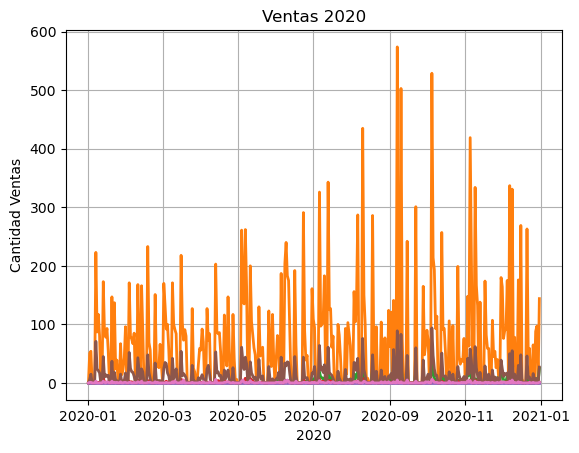

In [28]:
plt.plot(ventas_2020, lw = 2)
plt.xlabel('2020')
plt.ylabel('Cantidad Ventas')
plt.title('Ventas 2020')
plt.grid(True)
  
plt.show()

#### Podemos observar un incremento en el mes de septiembre ¿cómo son las ventas en septiembre respecto a los demás años?

In [29]:
ventas_septiembre = df_registros_zona[df_registros_zona.index.month == 9] # Todos los años
ventas_septiembre

,BUENAVENTURA,CALI,CANDELARIA,CAUCA,CENTRO,DAGUA VALLE,KM 30
FECHA,,,,,,,
2013-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-09-02,0.0,1.0,0.0,0.0,0.0,133.0,0.0
2013-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-09-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-09-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2020-09-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-28,0.0,165.0,10.0,5.0,0.0,39.0,0.0


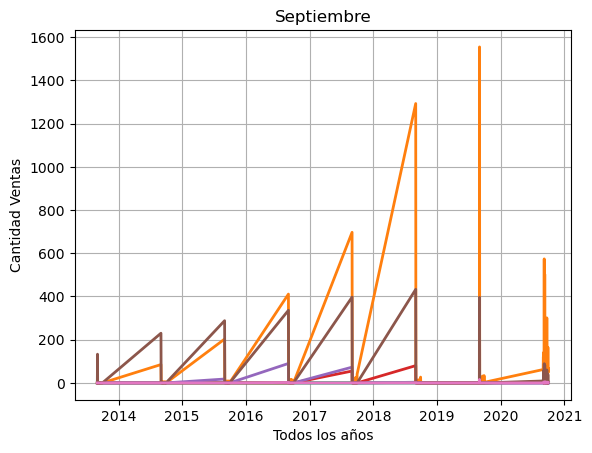

In [30]:
plt.plot(ventas_septiembre, lw = 2)
plt.xlabel('Todos los años')
plt.ylabel('Cantidad Ventas')
plt.title('Septiembre')
plt.grid(True)
  
plt.show()

#### Se refleja un incremento constante en las ventas en el mes de septiembre, en especial la ciudad de Cali

### Media de ventas de servicios de internet en un intervalo semanal
### AÑO 2021

In [31]:
ventas_2021 = df_registros_zona['2021-01-01':'2021-12-31']
ventas_2021
ventas_2021=ventas_2021.resample('W').mean()

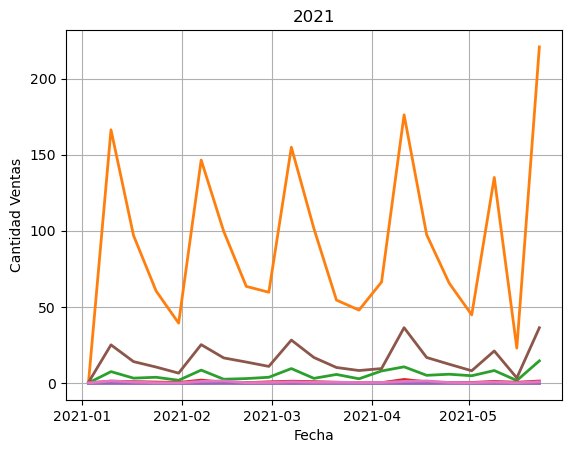

In [32]:
plt.plot(ventas_2021, lw = 2)
plt.xlabel('Fecha')
plt.ylabel('Cantidad Ventas')
plt.title('2021')
plt.grid(True)
  
plt.show()

### Crecimiento porcentual semanal de ventas en cada zona

In [33]:
ventas_2021 = df_registros_zona['2021-01-01':'2021-12-31']
# El cambio de porcentaje después de n número de elementos
ventas_2021=ventas_2021.resample('W').mean().pct_change()
ventas_2021

,BUENAVENTURA,CALI,CANDELARIA,CAUCA,CENTRO,DAGUA VALLE,KM 30
FECHA,,,,,,,
2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-10,inf,inf,inf,inf,NaN,74.000000,inf
2021-01-17,-1.0,-0.417526,-0.576923,-0.250000,NaN,-0.440000,-0.555556
2021-01-24,inf,-0.376106,0.181818,-0.333333,NaN,-0.255102,-0.750000
2021-01-31,-1.0,-0.349882,-0.538462,-0.500000,NaN,-0.383562,-1.000000
2021-02-07,NaN,2.727273,3.916667,5.500000,NaN,2.911111,inf
2021-02-14,inf,-0.320000,-0.711864,-0.769231,NaN,-0.346591,0.285714
2021-02-21,-1.0,-0.362984,0.176471,-0.666667,NaN,-0.165217,-0.888889
2021-02-28,inf,-0.060811,0.300000,4.000000,NaN,-0.208333,1.000000


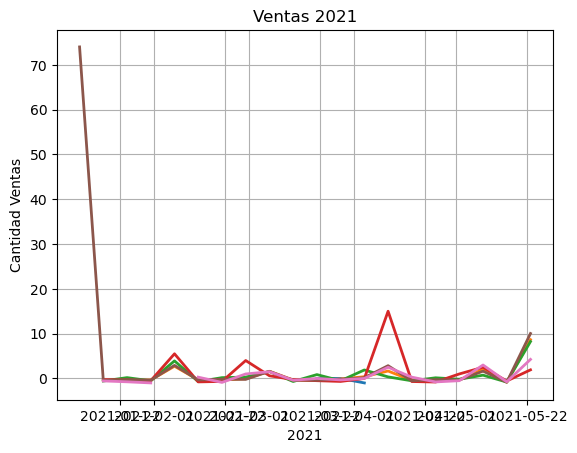

In [34]:
plt.plot(ventas_2021, lw = 2)
plt.xlabel('2021')
plt.ylabel('Cantidad Ventas')
plt.title('Ventas 2021')
plt.grid(True)
  
plt.show()

### Análisis en las tendencias de las serie de tiempo
#### Promedio móvil de 1 mes de ventas en cada zona en el año 2020

In [35]:
ventas_2020=df_registros_zona['2020-01-01':'2020-12-31']
# El cambio de porcentaje después de n número de elementos
ventas_2020=ventas_2020.resample('W').mean().pct_change()
ventas_2020=ventas_2020.rolling('30D').mean()

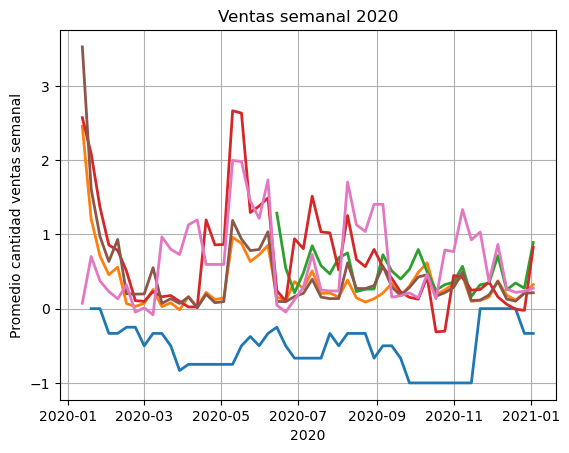

In [36]:
plt.plot(ventas_2020, lw = 2)
plt.xlabel('2020')
plt.ylabel('Promedio cantidad ventas semanal')
plt.title('Ventas semanal 2020')
plt.grid(True)
  
plt.show()

### Análisis en las tendencias de las serie de tiempo
#### Predicciones

In [99]:
import pprint
%matplotlib inline

In [103]:
# datos = pd.DataFrame(merged_productos)
df_1 = pd.DataFrame(df_principal)
df_1.columns
# Preparación de los datos
dicc = {
    'FECHA' : df_1['FECHA'],
    'CANTIDAD': df_1['TOTAL']
    
}
df_prediccion = pd.DataFrame(dicc)
df_prediccion = df_prediccion.groupby(['FECHA'])['CANTIDAD'].count().reset_index()
# elimina las filas que tengas fecha vacia (420)
df_prediccion = df_prediccion.dropna()
df_prediccion = df_prediccion.replace(0, df_prediccion['CANTIDAD'].mean() )
df_prediccion = df_prediccion.astype({'CANTIDAD': np.float})
#df_prediccion['FECHA'] = pd.to_datetime(df_prediccion['FECHA'], errors='coerce')
df_prediccion.head()

,FECHA,CANTIDAD
0,2013-07-01,2.0
1,2013-07-02,125.0
2,2013-07-03,1.0
3,2013-07-08,4.0
4,2013-07-13,1.0


In [104]:
dataset = df_prediccion

dataset['Month'] = df_prediccion['FECHA'].dt.month
dataset['Year'] = df_prediccion['FECHA'].dt.year
dataset['Date'] = df_prediccion['FECHA'].dt.date
dataset['Time'] = df_prediccion['FECHA'].dt.time
dataset['Week'] = df_prediccion['FECHA'].dt.week
dataset['Day'] = df_prediccion['FECHA'].dt.day_name()
dataset = df_prediccion.set_index('FECHA')
dataset.index = pd.to_datetime(dataset.index)
dataset.info()


<ipython-input-104-f8b7d16bb77c>:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dataset['Week'] = df_prediccion['FECHA'].dt.week


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1653 entries, 2013-07-01 to 2021-05-20
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CANTIDAD  1653 non-null   float64
 1   Month     1653 non-null   int64  
 2   Year      1653 non-null   int64  
 3   Date      1653 non-null   object 
 4   Time      1653 non-null   object 
 5   Week      1653 non-null   int64  
 6   Day       1653 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 103.3+ KB


#### pruebas.

In [105]:
df_prediccion.head(1)

,FECHA,CANTIDAD,Month,Year,Date,Time,Week,Day
0,2013-07-01,2.0,7,2013,2013-07-01,00:00:00,27,Monday


In [106]:
df_prediccion.Year.unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Cnt ventas obtenidas por año')

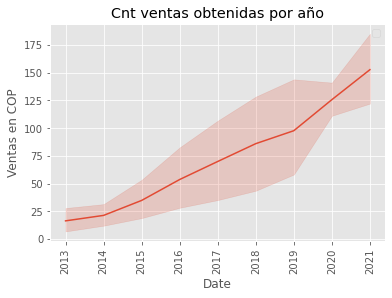

In [107]:
from matplotlib import style 

fig = plt.figure()
axl = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset['Year'], y=dataset['CANTIDAD'], data=df_prediccion)

plt.title('Cnt ventas obtenidas')
plt.xlabel('Date')
plt.ylabel('Ventas en COP')
plt.grid(True)
plt.legend()

for label in axl.xaxis.get_ticklabels():
    label.set_rotation(90)

plt.title('Cnt ventas obtenidas por año')

No handles with labels found to put in legend.


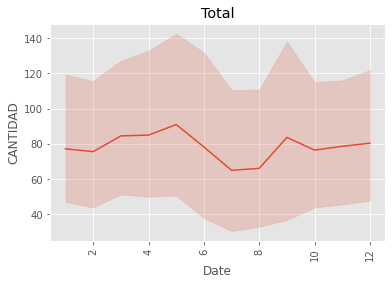

In [109]:
fig = plt.figure()
axl = fig.add_subplot(111)

sns.lineplot(x=dataset['Month'],y=dataset['CANTIDAD'], data=df_prediccion)
plt.title('Total')
plt.xlabel('Date')
plt.grid(True, alpha=1)
plt.legend()

for label in axl.xaxis.get_ticklabels():
    label.set_rotation(90)



### Reemzamble de datos

In [110]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.optimizers import SGD

In [111]:
NewDataSet = dataset.resample('D').mean()

In [112]:
print('Dataset antiguo', dataset.shape)
print('Dataset nuevo', NewDataSet.shape)

Dataset antiguo (1653, 7)
Dataset nuevo (2881, 4)


In [113]:
# Datos de prueba
TestData = NewDataSet.tail(100)
Training_Set = NewDataSet.iloc[:,0:1]
Training_Set = Training_Set[:-60]

In [114]:
print('Forma de conjunto de entrenamiento', Training_Set.shape)
print('forma de conjunto de prueba', TestData.shape)

Forma de conjunto de entrenamiento (2821, 1)
forma de conjunto de prueba (100, 4)


In [115]:
Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [116]:
# Entrenamiento
X_Train = []
Y_Train = []

# Rango de valores
for i in range(60, Train.shape[0]):
    
    X_Train.append(Train[i-60:i])
    
    Y_Train.append(Train[i])
    

# Convierte a Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)
    
print(X_Train.shape)
print(Y_Train.shape)

(2761, 60, 1)
(2761, 1)


In [117]:
X_Train = np.where(np.isnan(X_Train), ma.array(X_Train, mask=np.isnan(X_Train)).mean(axis=0), X_Train)
Y_Train = np.where(np.isnan(Y_Train), ma.array(Y_Train, mask=np.isnan(Y_Train)).mean(axis=0), Y_Train) 

In [118]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(2761, 60, 1)

## Modelo Keras Deep Learning - Redes Neuronales

In [119]:
regressor = Sequential()

# Adiciona el primer elemento
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adiciona el segundo elemento
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adiciona el tercero elemento
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adiciona el cuarto elemento
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Salida
regressor.add(Dense(units = 1))

# compile model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


### Entrenamiento

In [120]:
regressor.fit(X_Train, Y_Train, epochs=50, batch_size=32)

Epoch 1/50
87/87 [==============================] - 6s 69ms/step - loss: 0.0075
Epoch 2/50
87/87 [==============================] - 6s 73ms/step - loss: 0.0073
Epoch 3/50
87/87 [==============================] - 6s 75ms/step - loss: 0.0071
Epoch 4/50
87/87 [==============================] - 6s 73ms/step - loss: 0.0073
Epoch 5/50
87/87 [==============================] - 6s 75ms/step - loss: 0.0071
Epoch 6/50
87/87 [==============================] - 6s 75ms/step - loss: 0.0071
Epoch 7/50
87/87 [==============================] - 7s 76ms/step - loss: 0.0070
Epoch 8/50
87/87 [==============================] - 7s 75ms/step - loss: 0.0070
Epoch 9/50
87/87 [==============================] - 6s 74ms/step - loss: 0.0071
Epoch 10/50
87/87 [==============================] - 7s 75ms/step - loss: 0.0071
Epoch 11/50
87/87 [==============================] - 7s 77ms/step - loss: 0.0069
Epoch 12/50
87/87 [==============================] - 7s 75ms/step - loss: 0.0068
Epoch 13/50
87/87 [==================

In [121]:
# Ultimos 2 datos del test
TestData.head(2)

,CANTIDAD,Month,Year,Week
FECHA,,,,
2021-02-10,150.0,2.0,2021.0,6.0
2021-02-11,201.0,2.0,2021.0,6.0


In [122]:
# Figura del test
TestData.shape

(100, 4)

In [123]:
print(TestData.isnull().sum())

CANTIDAD    30
Month       30
Year        30
Week        30
dtype: int64


In [124]:
# Figura datos
NewDataSet.shape

(2881, 4)

In [125]:
# DataFrame con datos de test y reales
Df_Total = pd.concat((NewDataSet[["CANTIDAD"]], TestData[["CANTIDAD"]]), axis=0)

In [126]:
# Figura del DataFrame
Df_Total.shape

(2981, 1)

In [127]:
# Entradas
inputs=Df_Total[len(Df_Total)- len(TestData)-60:].values
inputs.shape

(160, 1)

In [128]:
# Entrenamiento
inputs = Df_Total[len(Df_Total) - len(TestData) -60:].values

inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])

X_test = np.array(X_test)
X_test = np.where(np.isnan(X_test), ma.array(X_test, mask=np.isnan(X_test)).mean(axis=0), X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

precio_esperado = regressor.predict(X_test)

precio_esperado = sc.inverse_transform(precio_esperado)

In [129]:
# Entradas
ValorTest = TestData["CANTIDAD"].to_list()
ValorEsperado = precio_esperado
fecha = TestData.index.to_list()

In [130]:
Prediccion = pd.DataFrame(data={
"fecha":fecha,
"ValorTest": ValorTest,
"ValorPredicción":[x[0]for x in ValorEsperado ]
})

In [131]:
# Resultado Final
Prediccion['ValorTest'].fillna(0, inplace = True)
Prediccion

,fecha,ValorTest,ValorPredicción
0,2021-02-10,150.0,65.867813
1,2021-02-11,201.0,67.321480
2,2021-02-12,147.0,69.642937
3,2021-02-13,0.0,70.829842
4,2021-02-14,0.0,71.927536
...,...,...,...
95,2021-05-16,0.0,70.020256
96,2021-05-17,0.0,69.029266
97,2021-05-18,815.0,67.726440
98,2021-05-19,88.0,65.695923


# Comportamiento de ventas aproximado

No handles with labels found to put in legend.


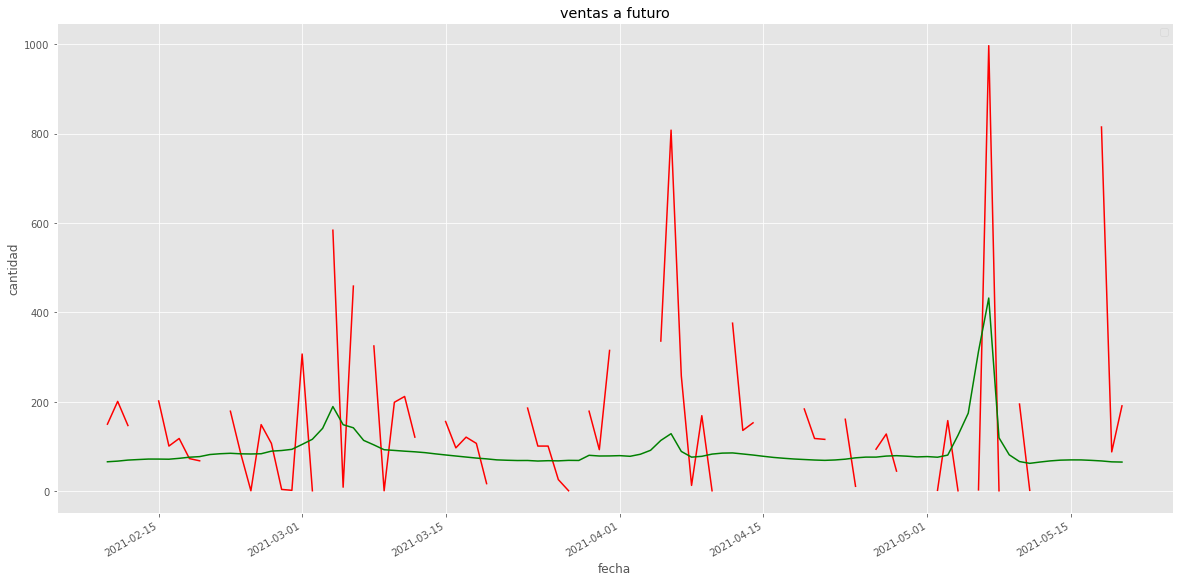

In [132]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(111)

x = fecha
y = ValorTest

y1 = ValorEsperado

plt.plot(x,y, color="red") # valores reales
plt.plot(x,y1, color="green") # valores esperados

plt.gcf().autofmt_xdate()
plt.xlabel('fecha')
plt.ylabel('cantidad')
plt.title("ventas a futuro")
plt.legend()